Strang

Numerical recipes

Do in lean? C?

Hamming book? Not pseudo code.


Jax numpy torch
fortran could be fun. Never learned it

Julia.

https://projectlovelace.net/problems/ dead as a doornail for sure
https://www.physik.uzh.ch/~psaha/teach/42probs.pdf 42 problems in scietnfific computation

https://ocw.mit.edu/courses/18-336-numerical-methods-for-partial-differential-equations-spring-2009/pages/lecture-notes/

https://ocw.mit.edu/search/?t=Numerical+Simulation


Singularities in complex integrals

https://hypothesis.readthedocs.io/en/latest/reference/strategies.html#hypothesis-numpy

In [4]:
import hypothesis.strategies as st
import hypothesis.extra.numpy as hnp
import numpy as np
hnp.arrays(np.float64, (2,2)).example()

array([[-5.96046448e-008,              nan],
       [ 1.17549435e-038, -1.11253693e-308]])

# Fortran
https://fortran-lang.org/learn/quickstart/

Huh is numpy more like fortran? Or did fortran learn from other stuff?

In [41]:
%%file /tmp/hello.f90
program hello
implicit none
    integer :: a(3)
    integer :: y
    print *, "Hello, world!"   
    ! This is a comment
    a = [1,2,3]
    print *, a, size(a), shape(a), maxval(a), minval(a)
    y = a(1)
    ! pretty interesting indexful mapping syntax
    where (a > 2)
        a = 78
    elsewhere (a > 1)
        a = 42
    end where
    print *, a
end program hello

Overwriting /tmp/hello.f90


In [42]:
! gfortran /tmp/hello.f90 -o /tmp/hello && /tmp/hello

 Hello, world!
           1           2           3           3           3           3           1
           1          42          78


# What's new in numpy

I mean, who knows what state of mind I was in last I looked at it

array_function interface  https://numpy.org/doc/stable/reference/arrays.interface.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html 

numpy.random.generator pulggable bitGenerators

numpy.typing. ArrayLike and DTypeLike https://numpy.org/devdocs/reference/typing.html


sliding_window_view

Reduction by `where`



ipywebrtc interesting. Maybe good to see how they did this for accelerometer / magnet data

In [4]:
from ipywebrtc import CameraStream, ImageRecorder
camera = CameraStream(constraints=
                      {'facing_mode': 'user',
                       'audio': False,
                       'video': { 'width': 640, 'height': 480 }
                       })
camera

CameraStream(constraints={'facing_mode': 'user', 'audio': False, 'video': {'width': 640, 'height': 480}})

pyaudio

In [ ]:
import wave
import sys

import pyaudio

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1 if sys.platform == 'darwin' else 2
RATE = 44100
RECORD_SECONDS = 5

def record
with wave.open('output.wav', 'wb') as wf:
    p = pyaudio.PyAudio()
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)

    stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True)

    print('Recording...')
    for _ in range(0, RATE // CHUNK * RECORD_SECONDS):
        wf.writeframes(stream.read(CHUNK))
    print('Done')

    stream.close()
    p.terminate()

https://github.com/spatialaudio/python-sounddevice/

Record. Also seems like it can do it streaming
Also use cocotb to expierment using fpga?
image processing on fpga also. hmmm.

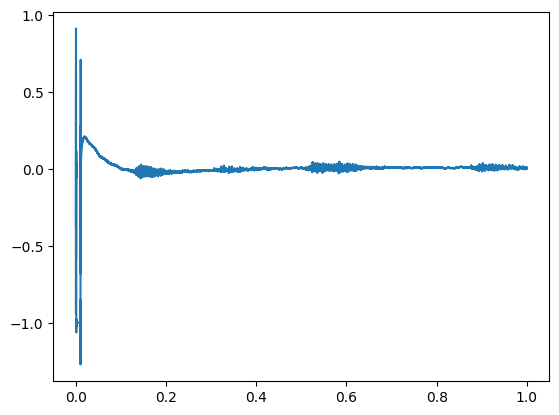

In [4]:
import sounddevice as sd
import numpy as np
import soundfile as sf 
RATE = 44100
seconds = 1  # Duration of recording
audio = sd.rec(int(seconds * RATE), samplerate=RATE, channels=1, dtype="float32")
sd.wait()   
sf.write("/tmp/test.wav", audio, RATE)
import matplotlib.pyplot as plt

t = np.linspace(0, seconds, int(RATE * seconds), endpoint=False)
audio = audio.squeeze()
plt.plot(t, audio)

In [10]:
from IPython.display import Audio
#Audio(10*audio, rate=44_100, autoplay=True)

In [7]:
import subprocess
def play(audio):
    sf.write("/tmp/test.wav", audio, 44100)
    subprocess.run(["play", "/tmp/test.wav"])
play(audio)

play WARN alsa: can't encode 0-bit Unknown or not applicable

/tmp/test.wav:

 File Size: 88.2k     Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:01.00  

In:100%  00:00:01.00 [00:00:00.00] Out:44.1k [      |      ] Hd:0.0 Clip:0    
Done.


In [2]:
! play /tmp/test.wav

play WARN alsa: can't encode 0-bit Unknown or not applicable

/tmp/test.wav:

 File Size: 88.2k     Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:01.00  

In:100%  00:00:01.00 [00:00:00.00] Out:44.1k [      |      ] Hd:0.0 Clip:0    
Done.


Not working in vs code. Not sure why

In [9]:
import numpy as np
from IPython.display import Audio, display

fs = 44_100          # sample rate
t  = np.linspace(0, 2, 2*fs, endpoint=False)  # 2-second clip
tone = 0.2*np.sin(2*np.pi*440*t).astype(np.float32)

#display(Audio(tone, rate=fs, autoplay=True))

Modulating my audio would involve upscaling it a lot (?) Well, I'm probably in the 400Hz range. Could filter out the higher stuff.

https://superuser.com/questions/1570333/how-can-i-record-audio-output-from-command-line-in-linux
Lean read audio from file?
pipewire or arecord
pulseaudio
arecord https://linux.die.net/man/1/arecord
pw-cat https://linuxcommandlibrary.com/man/pw-cat



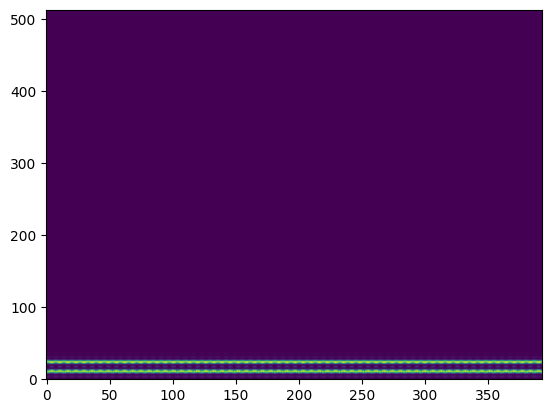

In [18]:
import scipy.signal as signal
#plt.plot(signal.periodogram(tone, fs=RATE, scaling='spectrum', nfft=1024))
tone2 = 0.2*np.sin(2*np.pi*1000*t).astype(np.float32)
plt.imshow(signal.spectrogram(tone + tone2, fs=RATE, nfft=1024)[2], aspect='auto', origin='lower')


https://pysdr.org/ 

# statistical optics

Goodman statistical optics
2d. I always liked this one. Monte carlo
https://www.philipzucker.com/aesthetic-javascript-eduction/
Geometry + random sources

Citert van Zernike
Etendue from random configs.

Hypothesis testing of etendue conservation

PPL ray tracing. huh. rough surfaces. statistical phase.

PPL gaussian expansion. feynman diagrams automattically.
PPL marshall. x > 0 is some erf.

Actually put in the number for white light and a light bulb across the room.
Arago spot



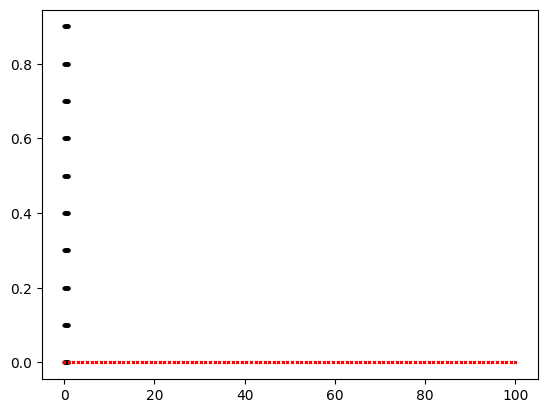

In [ ]:
srcx, srcy = np.meshgrid(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
#obs_pos = 
# filter out into a circle?
# line src?
j = np.random.normal(0, 0.1, srcx.shape)
plt.plot(srcx.flatten(), srcy.flatten(), 'o', markersize=2, color='black')





screenx = np.linspace(0, 100, 100)
screeny = np.zeros(100)

plt.plot(screenx, screeny, 'x', markersize=2, color='red')


# method of images

     |
x    |     o
     |



In [ ]:
x,y = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
# positions on metal
x = x.flatten()
y = y.flatten()
z = np.zeros(x.shape)

# V is const on surface
# surface chage = Q
# A surf = Q

# Q at position (0,0,1)
Qdist = np.sqrt(x**2 + y**2 + 1)
V0 = 1/Qdist

x1 = x.reshape(1, x.size)
y1 = y.reshape(1, y.size)
x = x.reshape(x.size, 1)
y = y.reshape(y.size, 1)

#z1 = z.reshape(1, z.shape)

surfdist = np.sqrt((x - x1)**2 + (y - y1)**2)
np.fill_diagonal(surfdist, 1)  # avoid division by zero
V = 1/surfdist
np.fill_diagonal(V, 1)  # avoid division by zero in the matrix equation
# 1/surfdist @ Qsurf + V0 = const
# sum Q = 1?


Qsurf = np.linalg.solve(V, V0)

measuring along an axis and comparing to field from virtual charge.

How do I package this all up in an interface?
The axe reshapings are confusing.

Edge effects.

Incoming: surface points.
Masks of equal V?

Incmoign: A set of surfaces? Break up into fragments. Integrate to get Cij coefficients.
self capacitance

type VSurf = list[tuple[float, Bspline]]

def EMSolve(Qpoints, Vsurf):
    VSurf = [(V, surf)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.nsum.html#scipy.integrate.nsum

type Fun[A,B] = Callable[[A], B]

type Surf = Callable[]


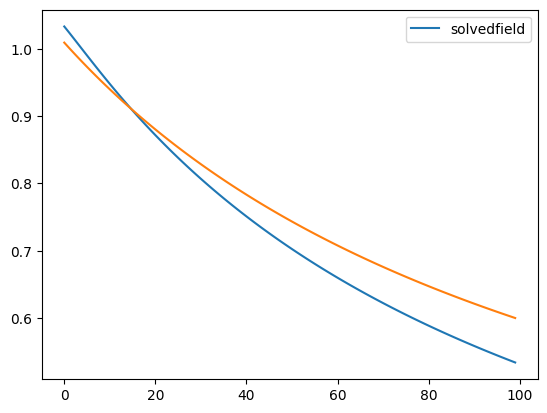

In [71]:
zmeas = np.linspace(0.1,1, 100).reshape(1, -1)
plt.plot(np.dot(Qsurf, 1/np.sqrt(x**2 + y**2 + zmeas**2)), label='solvedfield')
plt.plot(1/(zmeas + 1).flatten() + 0.1)
plt.legend()

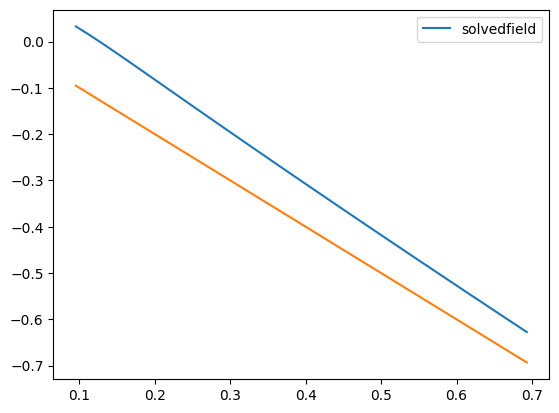

In [70]:
plt.plot(np.log(1+zmeas).flatten(), np.log(np.dot(Qsurf, 1/np.sqrt(x**2 + y**2 + zmeas**2))), label='solvedfield')
plt.plot(np.log(1+zmeas).flatten(), np.log(1/(zmeas + 1).flatten()))
plt.legend()

# Fast multiple method

https://arxiv.org/html/2508.02626v1  Boosting the Efficiency of the Differential Algebra-based Fast Multipole Method Using Symbolic Differential Algebra
TPSA trunacated power series algebra


In [ ]:
import sympy as sym
from sympy.abc import *
# shift function
def shift(t, x, a):
    return t.subs(x, x + a)
shift(sym.exp(x), x, 1)

def multipole():
    pass





exp(x + 1)

# Randomized Linear Algebra
https://www.siam.org/publications/siam-news/articles/randomized-linear-algebra-in-scientific-computing/

# Numerical verification
https://discourse.julialang.org/t/tools-for-computer-assisted-proofs-in-analysis/113479/12

In [1]:
from kdrag.all import *
from typing import Protocol, runtime_checkable

@runtime_checkable
class MetricSpace(Protocol):
    M : smt.ArrayRef
    dist : smt.FuncDeclRef
    refl : kd.Proof
    pos : kd.Proof
    symm : kd.Proof
    tri : kd.Proof

x,y,z = smt.Reals("x y z")
# Slightly odd usage of class. Don't instantiate. Everything is class member
class MetricR:
    M = smt.RealSort()
    dist = smt.Lambda([x,y], smt.Abs(x - y))
    refl = kd.prove(smt.ForAll([x], dist(x, x) == 0))
    pos = kd.prove(smt.ForAll([x, y], dist(x, y) >= 0))
    symm = kd.prove(smt.ForAll([x, y], dist(x, y) == dist(y, x)))
    tri = kd.prove(smt.ForAll([x,y,z] , dist(x, z) <= dist(x, y) + dist(y, z)))

assert isinstance(MetricR, MetricSpace)

M = smt.DeclareSort("AbstractM")
x,y,z = kd.tactics.FreshVars("x y z", M)
class AbstractMetric:
    M = M
    dist = smt.Function("dist", M, M, smt.RealSort())
    refl = kd.axiom(smt.ForAll([x], dist(x, x) == 0))
    pos = kd.axiom(smt.ForAll([x, y], dist(x, y) >= 0))
    symm = kd.axiom(smt.ForAll([x, y], dist(x, y) == dist(y, x)))
    tri = kd.axiom(smt.ForAll([x,y,z] , dist(x, z) <= dist(x, y) + dist(y, z)))


def Ball(M : MetricSpace, r, x):
    """Return the ball of radius r around the origin in M."""
    y = smt.FreshConst("y", M.M)
    return smt.Lambda([y], M.dist(x, y) < r)



def converge(M : MetricSpace, seq, x):
    """Return the convergence of a sequence in M."""
    eps = smt.Const("eps", smt.RealSort())
    n, N = smt.Ints("n N")
    return kd.QForAll([eps], eps > 0, smt.Exists([N], kd.QForAll([n], n > N, M.dist(seq(n), x) < eps)))

In [2]:
n = smt.Int("n")
l = kd.Lemma(converge(MetricR, smt.Lambda([n], 1 / smt.ToReal(n)), 0))
eps = l.fix()
l.intros()
l.exists(smt.ToInt(1/eps) + 1)
n = l.fix()
l.intros()
l.auto()
l.qed()

|= ForAll(eps,
       Implies(eps > 0,
               Exists(N,
                      ForAll(n,
                             Implies(n > N,
                                     If(1/ToReal(n) -
                                        ToReal(0) >
                                        0,
                                        1/ToReal(n) -
                                        ToReal(0),
                                        -(1/ToReal(n) -
                                        ToReal(0))) <
                                     eps)))))

In [3]:
n = smt.Int("n")
l = kd.Lemma(converge(MetricR, smt.Lambda([n], 1 / smt.ToReal(n)), 0))
eps = l.fix()
l.intros()
l.exists(smt.ToInt(1/eps) + 1)
n = l.fix()
l.intros()
l.auto()
l.qed()

|= ForAll(eps,
       Implies(eps > 0,
               Exists(N,
                      ForAll(n,
                             Implies(n > N,
                                     If(1/ToReal(n) -
                                        ToReal(0) >
                                        0,
                                        1/ToReal(n) -
                                        ToReal(0),
                                        -(1/ToReal(n) -
                                        ToReal(0))) <
                                     eps)))))

In [5]:
def banach(M):
    x,y = kd.FreshVars("x y", M.M)
    q = smt.Real("q")
    f = smt.Const("f", smt.ArraySort(M.M, M.M))
    return kd.QForAll([q], q >= 0, q < 1, M.dist(f(x), f(y)) <= q * M.dist(x, y),
                smt.Exists([z], f(z) == z)
    )

banach(MetricR)

AttributeError: 'SortRef' object has no attribute 'is_int'

In [ ]:
from kdrag.all import *
import kdrag.theories.set as set_
def Filter(X):
    SetX = set_.Set(X)
    U,V = smt.Consts("U V", SetX)
    N = smt.Const("N", set_.Set(set_.Set(X)))
    return kd.define("filter", [N],
    smt.And(
        N[SetX.full],
        smt.Not(N[SetX.empty]),
        kd.QForAll([U,V], N[V], V <= U, N[U]),
        kd.QForAll([U,V], N[U], N[V], N[U & V])
    ))

A = smt.DeclareSort("AbstractA")
Filter(A).defn


def upclose(X):
    Y = kd.FreshVar("Y", X.sort())
    smt.Lambda([Y],  )


       filter(N) ==
       And(N[K(AbstractA, True)],
           Not(N[K(AbstractA, False)]),
           ForAll([U!106, V!107],
                  Implies(And(N[V!107],
                              subset(V!107, U!106)),
                          N[U!106])),
           ForAll([U!106, V!107],
                  Implies(And(N[U!106], N[V!107]),
                          N[intersection(U!106, V!107)])))) to ForAll(N,
       filter(N) ==
       And(N[K(AbstractA, True)],
           Not(N[K(AbstractA, False)]),
           ForAll([U, V],
                  Implies(And(N[V], subset(V, U)), N[U])),
           ForAll([U, V],
                  Implies(And(N[U], N[V]),
                          N[intersection(U, V)]))))


|= ForAll(N,
       filter(N) ==
       And(N[K(AbstractA, True)],
           Not(N[K(AbstractA, False)]),
           ForAll([U, V],
                  Implies(And(N[V], subset(V, U)), N[U])),
           ForAll([U, V],
                  Implies(And(N[U], N[V]),
                          N[intersection(U, V)]))))

A big And can be packed and unpacked.


In [ ]:
class Filter(Protocol):
    pass
type Family = smt.ArrayRef
class Topology(Protocol):
    X : smt.SortRef
    T : Family # open[T]
    empty_open : kd.Proof
    full_open : kd.Proof
    bigunion_open : kd.Proof
    intersect_open : kd.Proof

class RealTop(Topology):
    X = smt.RealSort()
    T = smt.ArraySort(X, smt.BoolSort())


RSet = set_.Set(smt.RealSort())
def Ball(x,r):
    """Return the ball of radius r around x in R."""
    y = smt.Real("y")
    return smt.Lambda([y], smt.Abs(x - smt.Real("y")) < r)
A = smt.Const("A", RSet)
x,r = smt.Reals("x r")
real_open = smt.Lambda([A], 
    kd.QForAll([x], A[x], 
    kd.QExists([r], r > 0,
        Ball(x,r) <= A
    )
))
real_open

full_open = kd.prove(real_open[RSet.full])
empty_open = kd.prove(real_open[RSet.empty])
kd.prove(real_open(smt.Lambda([x], x > 0)))
kd.prove(real_open(smt.Lambda([x], smt.And(x > 0, x < 1))))
y = smt.Real("y")
kd.prove(real_open(smt.Lambda([x], smt.Or(x < 7, smt.And(x > 0, x < 1)))))
#kd.prove(real_open(smt.Lambda([x], smt.And(x > 0, x <= 1))))
kd.prove(smt.ForAll([y], real_open(smt.Lambda([x], x < y))))
kd.prove(kd.QForAll([y,r], r > 0, real_open(Ball(y, r))))
A,B = kd.FreshVars("A B", RSet)
kd.prove(smt.Implies(real_open(A) & real_open(B), real_open(A | B)))



TimeoutError: Timeout. Maybe you have given `prove` too many or not enough lemmas?

In [143]:
l = kd.Lemma(smt.Implies(real_open(A) & real_open(B), real_open(A | B)))
l.intros()
x = l.fix()
l.intros()
l.cases(A[x])


[x!5093];
[And(ForAll(x,
           Implies(A!3481[x],
                   Exists(r,
                          And(r > 0,
                              subset(Lambda(y,
                                        If(x - y > 0,
                                        x - y,
                                        -(x - y)) <
                                        r),
                                     A!3481))))),
    ForAll(x,
           Implies(B!3482[x],
                   Exists(r,
                          And(r > 0,
                              subset(Lambda(y,
                                        If(x - y > 0,
                                        x - y,
                                        -(x - y)) <
                                        r),
                                     B!3482)))))),
 union(A!3481, B!3482)[x!5093],
 A!3481[x!5093] == False]
?|= Exists(r,
       And(r > 0,
           subset(Lambda(y,
                         If(x!5093 - y > 0,
                  

In [59]:
Ball(x,r) < A

And(subset(Lambda(y, If(x - y > 0, x - y, -(x - y)) < r), A),
    (Lambda(y, If(x - y > 0, x - y, -(x - y)) < r)) != A)

In [9]:
from kdrag.all import *
import kdrag.theories.real as real
def Ball(x,r):
    """Return the ball of radius r around x in R."""
    y = smt.Real("y")
    return smt.Lambda([y], real.abs(x - smt.Real("y")) < r)
RSet = set_.Set(smt.RealSort())
def Ball(x,r):
    """Return the ball of radius r around x in R."""
    y = smt.Real("y")
    return smt.Lambda([y], real.abs(x - smt.Real("y")) < r)
A = smt.Const("A", RSet)
x,r = smt.Reals("x r")
real_open = smt.Lambda([A], 
    kd.QForAll([x], A[x], 
    kd.QExists([r], r > 0,
        Ball(x,r) < A
    )
))

x = smt.Real("x")
l = kd.Lemma(real_open(smt.Lambda([x], x > 0)))
#l.simp()
x = l.fix()
l.intros()
l.exists(x/3)
l.split()
l.auto()
l.split()
#l.simp()
l.auto(unfold=1)
t = l.top_goal().goal
#l.auto(by=[kd.prove(smt.Exists([y], t.arg(0)[y] != t.arg(1)[y]))])
def ineq_lift(lhs,rhs, x):
    return kd.axiom(smt.Implies(lhs[x] != rhs[x], lhs != rhs))

def ext_diseq(f, g):
    assert (isinstance(f, smt.QuantifierRef) and f.is_lambda())
    assert (isinstance(g, smt.QuantifierRef) and g.is_lambda())
    assert f.num_vars() == g.num_vars(), "Functions must have the same arity"
    assert all(f.var_sort(i) == g.var_sort(i) for i in range(f.num_vars())), "Functions must have the same domain"
    xs = [smt.FreshConst(f.var_sort(i), prefix=f.var_name(i)) for i in range(f.num_vars())]
    return kd.kernel.axiom((f != g) == smt.Exists(xs, f[*xs] != g[*xs]), ["ext_diseq", f, g])


#l.apply(ineq_lift(t.arg(0), t.arg(1), x/10))
l.eq(ext_diseq(t.arg(0), t.arg(1)))
#l.lemmas
#l.auto(by=[real.abs.defn])
#l.qed()
#l.auto()
#l.lemmas
#l.qed(admit=True)
#l.goals
#kd.prove(l.thm, admit=True)
#l.auto()
#l.simp()

ValueError: ('Eq tactic failed. Not an equality', (Lambda(y, absR(x!154 - y) < x!154/3)) != (Lambda(x, x > 0)))

In [ ]:
def ineq_lift(lhs,rhs):
    return kd.axiom(smt.Implies(smt.Exists([x], lhs[x] != rhs[x]), lhs != rhs))

In [ ]:
def lift_ineq(eq):
    assert eq.decl().name() == "distinct" and eq.num_args() == 2
    lhs,rhs = eq.children()
    assert 

In [93]:
#x = smt.Ext(t.arg(0), t.arg(1))
y = smt.Real("y")
kd.prove(smt.Exists([y], t.arg(0)[y] != t.arg(1)[y]))
kd.prove(t.arg(0)[-1] != t.arg(1)[-1])

LemmaError: (Lambda(y,
       If(x!451 - y > 0, x!451 - y, -(x!451 - y)) < x!451/3)[-1] !=
Lambda(x, x > 0)[-1], 'Countermodel', [x!451 = -7/8])